In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch 
from torch import nn
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

The data used for this project come from: https://archive.ics.uci.edu/dataset/242/energy+efficiency

### 1. Loading data

In [3]:
cols = ["relative_compactness", "surface_area", "wall_area", "roof_area", "overall_height", "orientation", "glazing_area",   
        "glazing_area_distribution", "heating_load", "cooling_load"]
dataset = pd.read_excel("energy_efficient.xlsx", names=cols)

**1.1 Exploratory Data Analysis**

In [4]:
dataset.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
dataset.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


**1.2 Data Visualization**

**1.2.1 Target - Heating Load**

In [7]:
sns.set_theme(style="whitegrid", palette="muted")

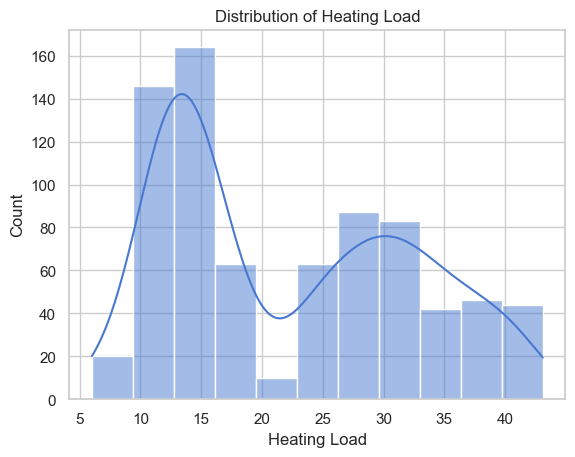

In [8]:
sns.histplot(dataset["heating_load"], kde=True)
plt.title("Distribution of Heating Load")
plt.xlabel("Heating Load")
plt.show()

**1.2.2 Features**

**1.2.2.1 - Relative Compactness**

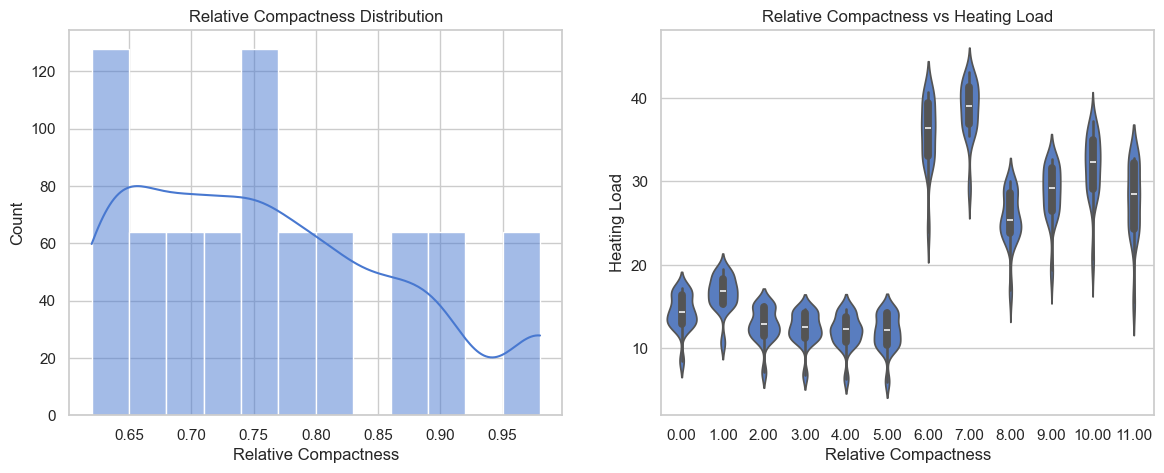

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()

sns.histplot(dataset["relative_compactness"], kde=True, ax=ax[0])
ax[0].set_title("Relative Compactness Distribution")
ax[0].set_xlabel("Relative Compactness")

h1 = sns.violinplot(x="relative_compactness", y="heating_load", data=dataset, ax=ax[1])
ax[1].set_xlabel("Relative Compactness")
ax[1].set_ylabel("Heating Load")
ax[1].set_title("Relative Compactness vs Heating Load")
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

**1.2.2.2 - Surface Area**

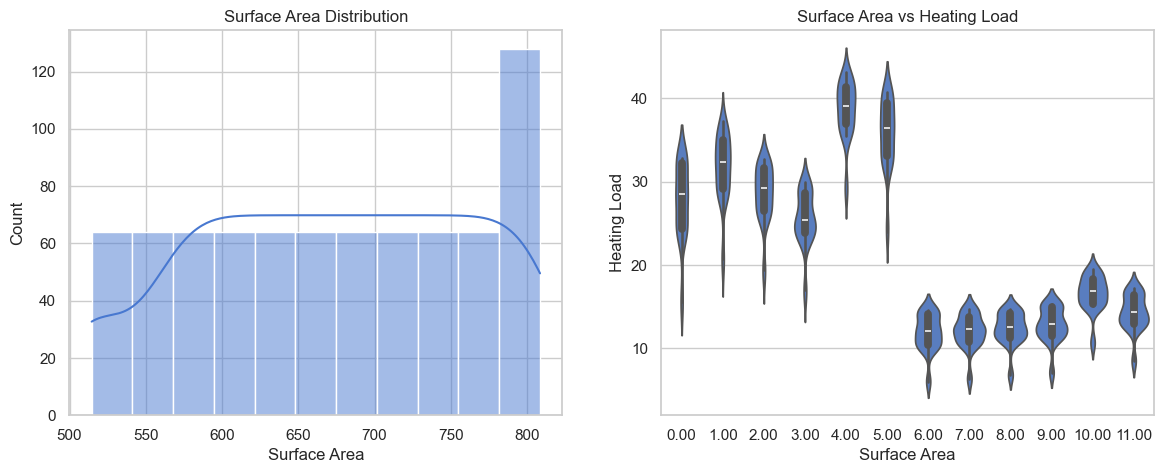

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()

sns.histplot(dataset["surface_area"], kde=True, ax=ax[0])
ax[0].set_title("Surface Area Distribution")
ax[0].set_xlabel("Surface Area")

h1 = sns.violinplot(x="surface_area", y="heating_load", data=dataset, ax=ax[1])
ax[1].set_xlabel("Surface Area")
ax[1].set_ylabel("Heating Load")
ax[1].set_title("Surface Area vs Heating Load")
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

**1.2.2.3 - Wall Area**

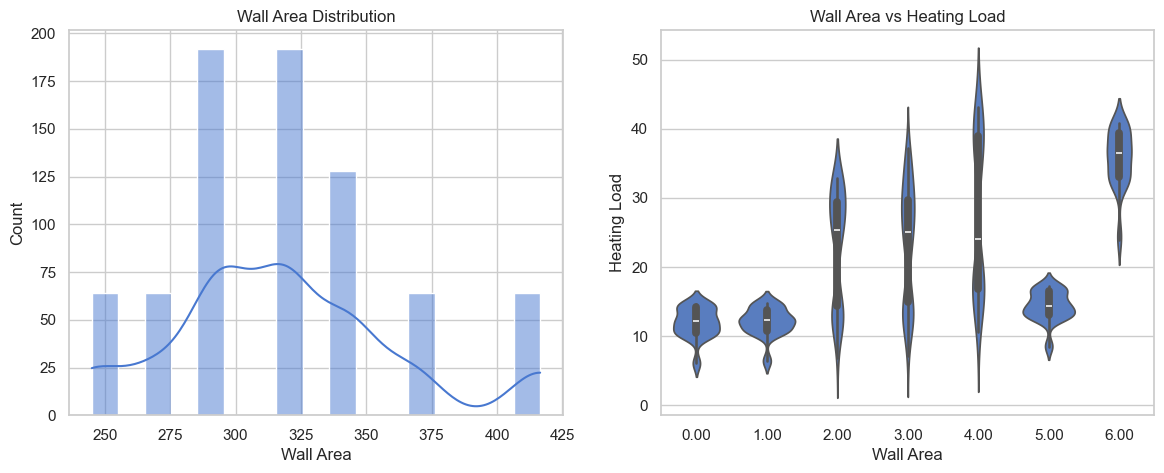

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()

sns.histplot(dataset["wall_area"], kde=True, ax=ax[0])
ax[0].set_title("Wall Area Distribution")
ax[0].set_xlabel("Wall Area")

h1 = sns.violinplot(x="wall_area", y="heating_load", data=dataset, ax=ax[1])
ax[1].set_xlabel("Wall Area")
ax[1].set_ylabel("Heating Load")
ax[1].set_title("Wall Area vs Heating Load")
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

**1.2.2.4 - Roof Area**

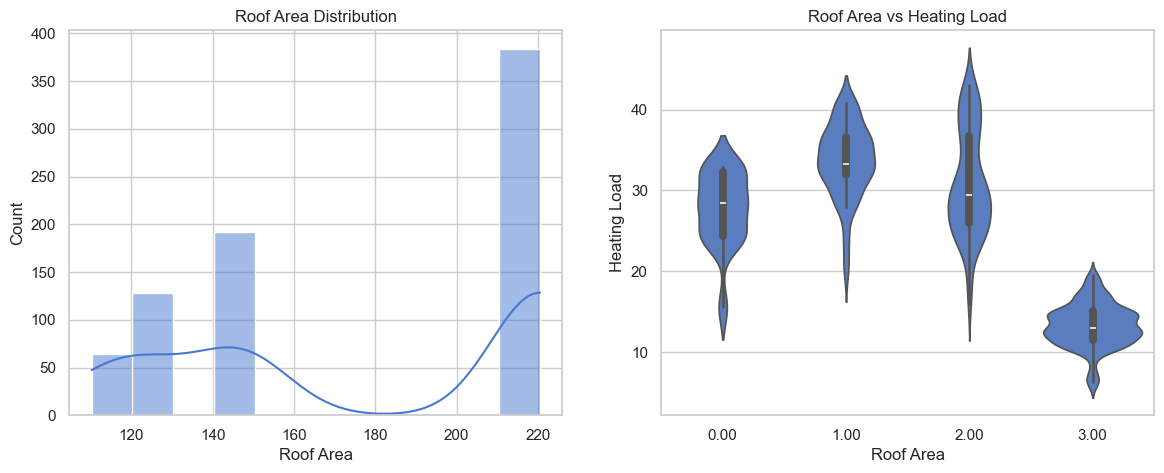

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()

sns.histplot(dataset["roof_area"], kde=True, ax=ax[0])
ax[0].set_title("Roof Area Distribution")
ax[0].set_xlabel("Roof Area")

h1 = sns.violinplot(x="roof_area", y="heating_load", data=dataset, ax=ax[1])
ax[1].set_xlabel("Roof Area")
ax[1].set_ylabel("Heating Load")
ax[1].set_title("Roof Area vs Heating Load")
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

**1.2.2.5 - Overall Height**

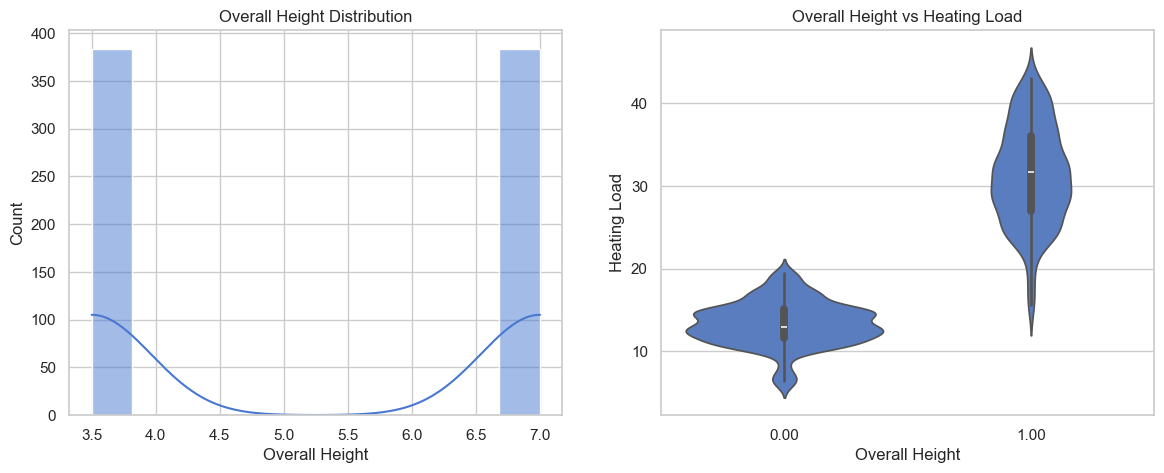

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()

sns.histplot(dataset["overall_height"], kde=True, ax=ax[0])
ax[0].set_title("Overall Height Distribution")
ax[0].set_xlabel("Overall Height")

h1 = sns.violinplot(x="overall_height", y="heating_load", data=dataset, ax=ax[1])
ax[1].set_xlabel("Overall Height")
ax[1].set_ylabel("Heating Load")
ax[1].set_title("Overall Height vs Heating Load")
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

**1.2.2.5 - Overall Height**

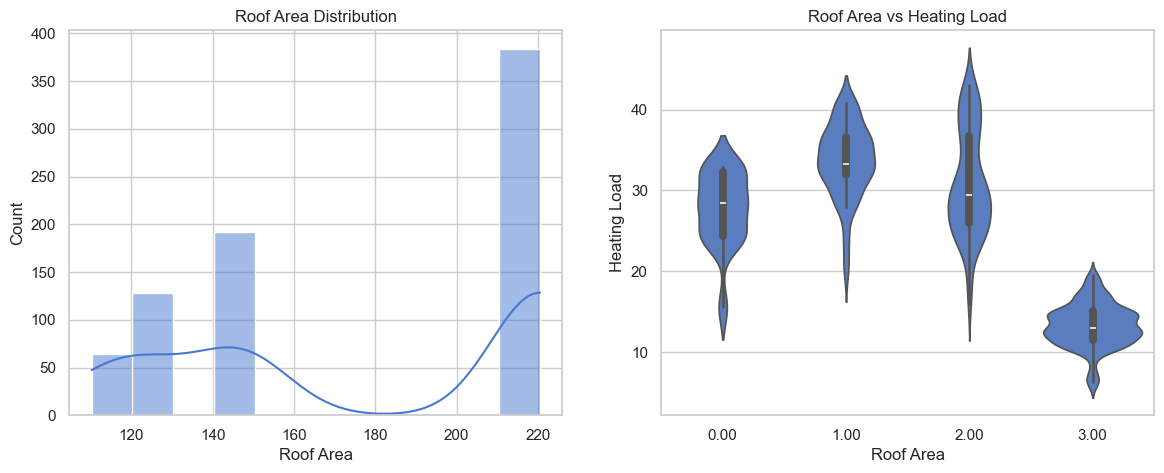

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()

sns.histplot(dataset["roof_area"], kde=True, ax=ax[0])
ax[0].set_title("Roof Area Distribution")
ax[0].set_xlabel("Roof Area")

h1 = sns.violinplot(x="roof_area", y="heating_load", data=dataset, ax=ax[1])
ax[1].set_xlabel("Roof Area")
ax[1].set_ylabel("Heating Load")
ax[1].set_title("Roof Area vs Heating Load")
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

**1.2.2.6 - Orientation**

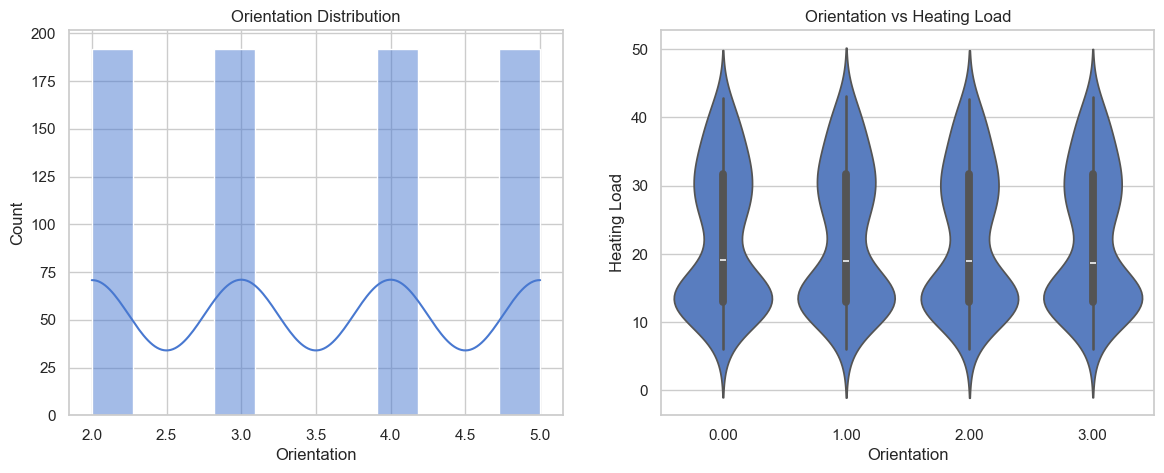

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()

sns.histplot(dataset["orientation"], kde=True, ax=ax[0])
ax[0].set_title("Orientation Distribution")
ax[0].set_xlabel("Orientation")

h1 = sns.violinplot(x="orientation", y="heating_load", data=dataset, ax=ax[1])
ax[1].set_xlabel("Orientation")
ax[1].set_ylabel("Heating Load")
ax[1].set_title("Orientation vs Heating Load")
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

**1.2.2.7 - Glazing Area**

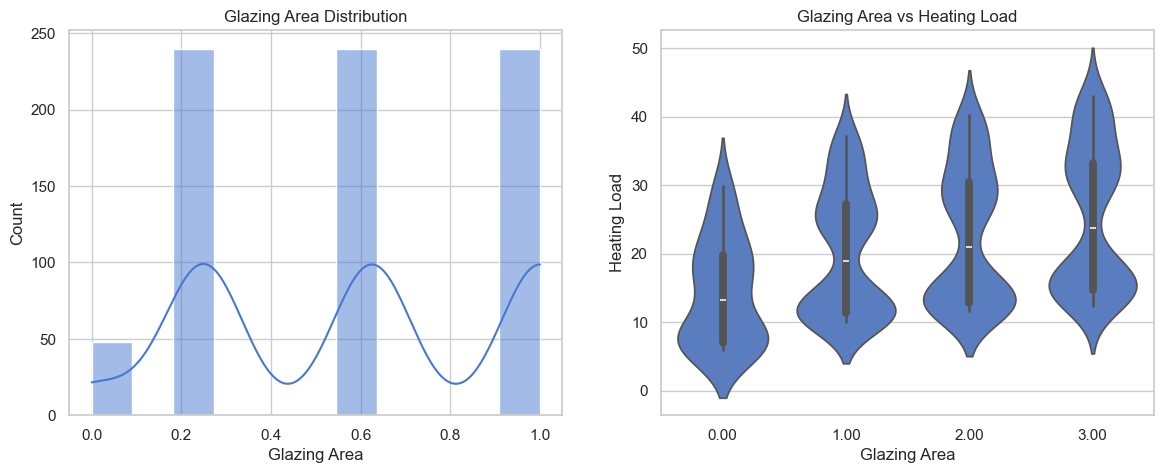

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()

sns.histplot(dataset["glazing_area"], kde=True, ax=ax[0])
ax[0].set_title("Glazing Area Distribution")
ax[0].set_xlabel("Glazing Area")

h1 = sns.violinplot(x="glazing_area", y="heating_load", data=dataset, ax=ax[1])
ax[1].set_xlabel("Glazing Area")
ax[1].set_ylabel("Heating Load")
ax[1].set_title("Glazing Area vs Heating Load")
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

**1.2.2.8 - Glazing Area Distribution**

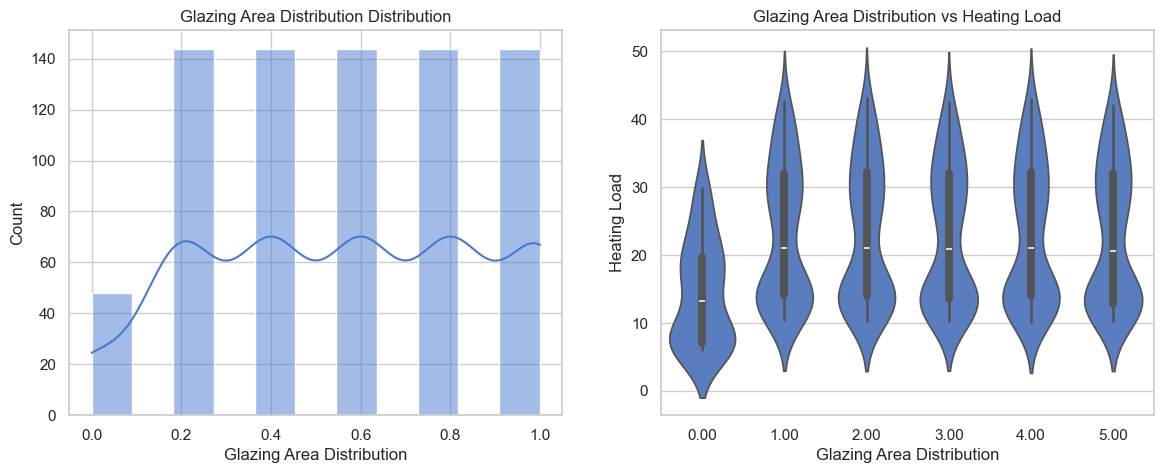

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()

sns.histplot(dataset["glazing_area_distribution"], kde=True, ax=ax[0])
ax[0].set_title("Glazing Area Distribution Distribution")
ax[0].set_xlabel("Glazing Area Distribution")

h1 = sns.violinplot(x="glazing_area_distribution", y="heating_load", data=dataset, ax=ax[1])
ax[1].set_xlabel("Glazing Area Distribution")
ax[1].set_ylabel("Heating Load")
ax[1].set_title("Glazing Area Distribution vs Heating Load")
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

**1.2.3 - Correlation Matrix**

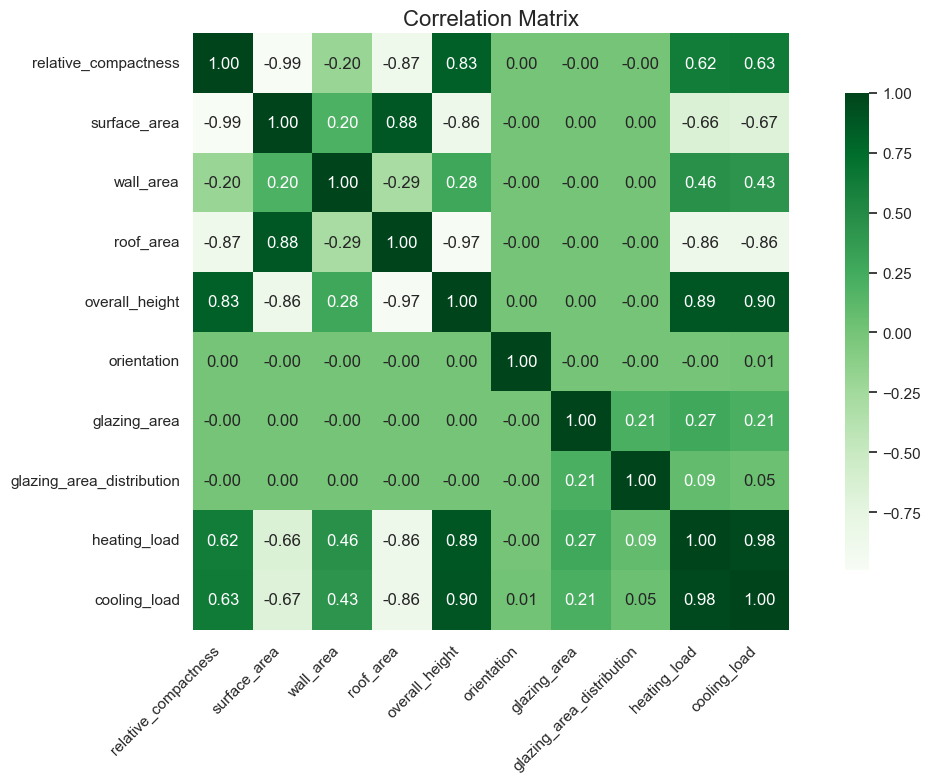

In [16]:
plt.figure(figsize=(12, 8)) 

sns.heatmap(
    dataset.corr(numeric_only=True),
    cmap="Greens",
    annot=True,
    fmt=".2f",       
    square=True,      
    cbar_kws={"shrink": 0.8} 
)

plt.title("Correlation Matrix", fontsize=16) 
plt.xticks(rotation=45, ha="right")           
plt.yticks(rotation=0)                        
plt.tight_layout()
plt.show()

### 2. Data cleaning

**2.1 Check and remove duplicates**

In [17]:
dataset.duplicated().sum()

np.int64(0)

**2.2 Detect missing values**

In [18]:
dataset.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [19]:
dataset.nunique()

relative_compactness          12
surface_area                  12
wall_area                      7
roof_area                      4
overall_height                 2
orientation                    4
glazing_area                   4
glazing_area_distribution      6
heating_load                 587
cooling_load                 636
dtype: int64

Don't need to correcting: validation, handling dates and times, handling outliers, correcting datatypes or dropping irrelavant columns.

**2.3 Feature Engineering**

**2.3.1 Scaling**

In [20]:
scaler = MinMaxScaler()

In [ ]:
columns_scaled = ["relative_compactness", "surface_area", "wall_area", "roof_area", "overall_height", "glazing_area"]
dataset_scaled = dataset[columns_scaled]

In [21]:
dataset_scaledd = dataset.iloc[:,:-2]
dataset_scaledd

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [22]:
scaled_values = scaler.fit_transform(dataset_scaledd)
dataset_scaled = pd.DataFrame(scaled_values, columns=dataset_scaledd.columns)
dataset_scaled

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


In [23]:
dataset = pd.concat([dataset_scaled, dataset.iloc[:,-2:]], axis=1)
dataset

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,15.55,21.33
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,15.55,21.33
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,15.55,21.33
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,15.55,21.33
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,17.88,21.40
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,16.54,16.88
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,16.44,17.11
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,16.48,16.61


1.4 Split dataset

In [ ]:
X = dataset.iloc[:,:-2]
y_heating = dataset["heating_load"]
y_cooling = dataset["cooling_data"]

In [ ]:
X_train, X_test, y_heating_train, y_heating_test, y_cooling_train, y_cooling_test = train_test_split(X, y_heating, y_cooling, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_heating_test), len(y_heating_train), len(y_cooling_test), len(y_cooling_train)

(614, 154, 154, 614, 154, 614)

2. Model Selection

2.1 Linear Regression Model

In [ ]:
model_linear = LinearRegression()

In [ ]:
model_linear.fit(X_train, y_heating_train)

In [ ]:
y_heating_test_pred = model_linear.predict(X_test)

In [ ]:
mse = mean_squared_error(y_heating_test, y_heating_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_heating_test, y_heating_test_pred)

In [ ]:
print("----------------------------------------------------")
print(" Linear Regression Model Summary")
print("----------------------------------------------------")
print(f"Intercept (bias): {model_linear.intercept_}")
print(f"Coefficients (weights):\n {model_linear.coef_}")
print("----------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R² Score: {r2:.6f}")
print("----------------------------------------------------")

----------------------------------------------------
 Linear Regression Model Summary
----------------------------------------------------
Intercept (bias): 30.149699414687873
Coefficients (weights):
 [-22.27440753  -8.53153116   1.10909178 -12.23800182  14.43284222
  -0.09731734   8.05727699   1.05551417]
----------------------------------------------------
Mean Squared Error (MSE): 9.153208
Root Mean Squared Error (RMSE): 3.025427
R² Score: 0.912185
----------------------------------------------------


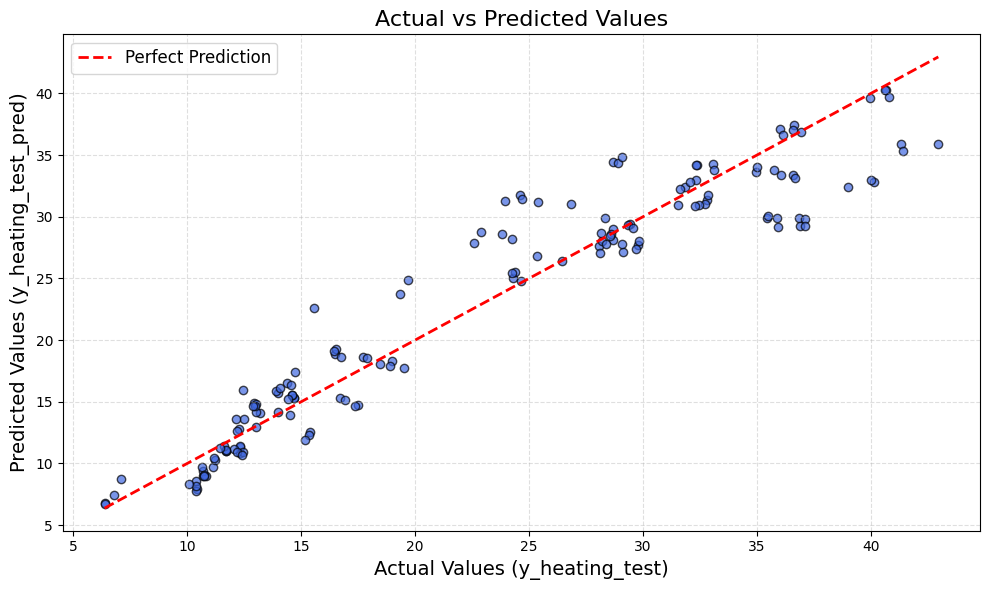

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(), y_heating_test_pred.min())
max_val = max(y_heating_test.max(), y_heating_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# plt.scatter(y_heating_test, y_heating_test_pred, label="Data", color="blue")
# x = tf.linspace(-20, 40, 100)
# plt.plot(X_test, model_linear.predict(np.array(X_test).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
# plt.legend()
# plt.title("Bikes vs Temp")
# plt.ylabel("Number of bikes")
# plt.xlabel("Temp")
# plt.show()


# def try_parameters(w, b):
#     ages = non_smoker_df.age
#     target = non_smoker_df.charges

#     estimated_charges = estimate_charges(ages, w, b)

#     plt.plot(ages, estimated_charges, "r", alpha=0.9)
#     plt.scatter(ages, target, s=8, alpha=0.8)
#     plt.xlabel("Age")
#     plt.ylabel("Charges")
#     plt.legend(["Estimate", "Actual"])

# def estimate_output(x, w, b):
#     return w * x + b

2.2 SGD Regressor Model

In [ ]:
model_sgd = SGDRegressor()

In [ ]:
model_sgd.fit(X_train, y_heating_train)

In [ ]:
y_heating_test_pred_sgd = model_linear.predict(X_test)

In [ ]:
mse = mean_squared_error(y_heating_test, y_heating_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_heating_test, y_heating_test_pred)

In [ ]:
print("----------------------------------------------------")
print(" Linear Regression Model Summary")
print("----------------------------------------------------")
print(f"Intercept (bias): {model_linear.intercept_}")
print(f"Coefficients (weights):\n {model_linear.coef_}")
print("----------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R² Score: {r2:.6f}")
print("----------------------------------------------------")

----------------------------------------------------
 Linear Regression Model Summary
----------------------------------------------------
Intercept (bias): 30.149699414687873
Coefficients (weights):
 [-22.27440753  -8.53153116   1.10909178 -12.23800182  14.43284222
  -0.09731734   8.05727699   1.05551417]
----------------------------------------------------
Mean Squared Error (MSE): 9.153208
Root Mean Squared Error (RMSE): 3.025427
R² Score: 0.912185
----------------------------------------------------


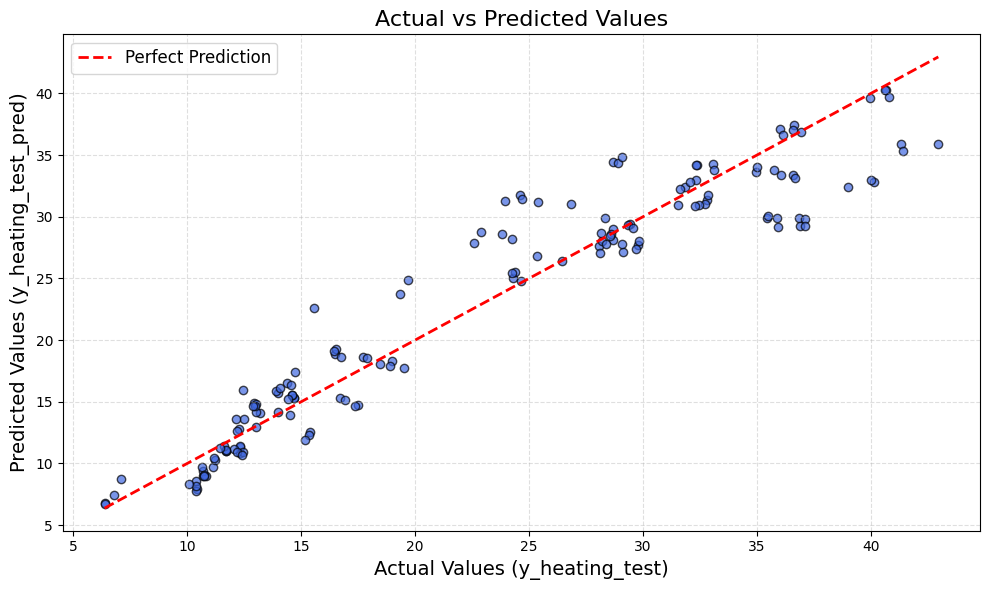

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(), y_heating_test_pred.min())
max_val = max(y_heating_test.max(), y_heating_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.3 TensorFlow Linear Model

In [ ]:
tf.random.set_seed(42)

model_linear_tf = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_linear_tf.compile(loss = tf.keras.losses.mae, optimizer= tf.keras.optimizers.Adam(), metrics=["mae"])

history = model_linear_tf.fit(X_train, y_heating_train, epochs=30, verbose=0)

In [ ]:
model_linear_tf.evaluate(X_test, y_heating_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4355 - mae: 2.4355 


[2.3811709880828857, 2.3811709880828857]

In [ ]:
y_heating_test_pred_tf_linear = model_linear_tf.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
tf.keras.metrics.MeanAbsoluteError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_linear))

<tf.Tensor: shape=(), dtype=float32, numpy=2.3811709880828857>

In [ ]:
tf.keras.metrics.MeanSquaredError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_linear))

<tf.Tensor: shape=(), dtype=float32, numpy=10.971295356750488>

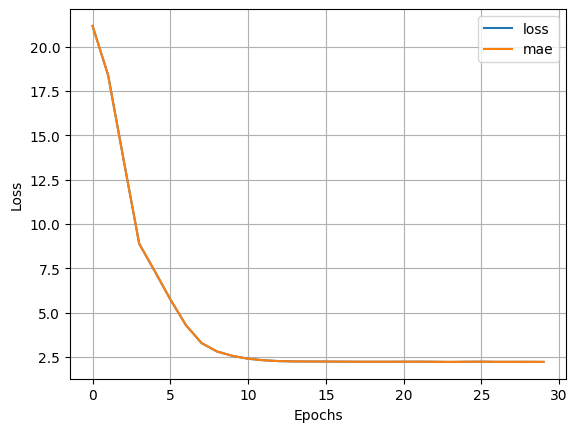

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

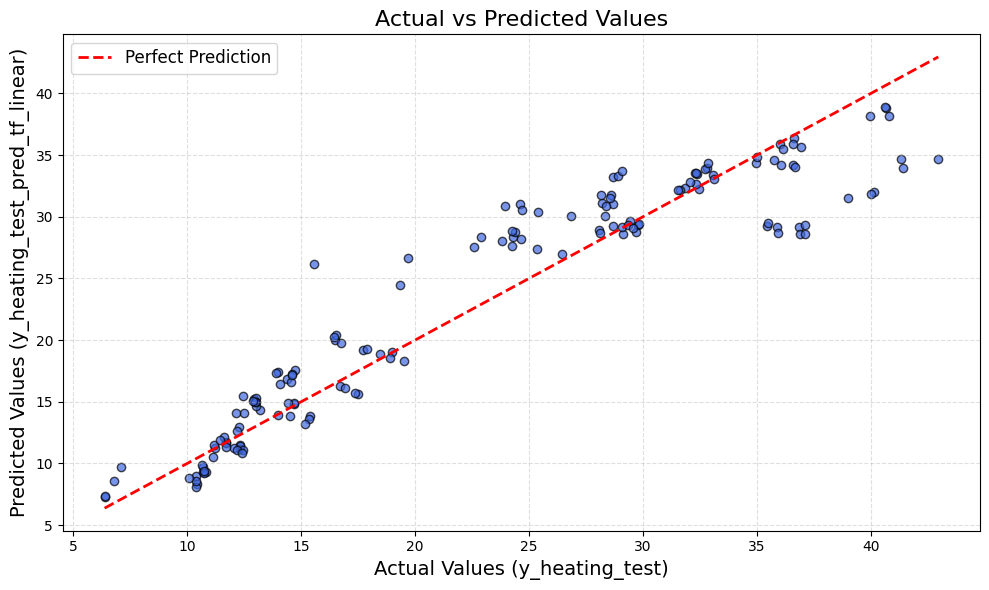

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred_tf_linear, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(),y_heating_test_pred_tf_linear.min())
max_val = max(y_heating_test.max(), y_heating_test_pred_tf_linear.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred_tf_linear)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.4 TensorFlow NeuralNetwork Model

In [ ]:
tf.random.set_seed(42)

nn_model_tf = tf.keras.Sequential([ 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

nn_model_tf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

history = nn_model_tf.fit(X_train, y_heating_train, epochs = 30, verbose= 0)

In [ ]:
nn_model_tf.evaluate(X_test, y_heating_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.1372  


9.317234992980957

In [ ]:
y_heating_test_pred_tf_nn = nn_model_tf.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
tf.keras.metrics.MeanAbsoluteError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_nn))

<tf.Tensor: shape=(), dtype=float32, numpy=2.0885603427886963>

In [ ]:
tf.keras.metrics.MeanSquaredError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_nn))

<tf.Tensor: shape=(), dtype=float32, numpy=9.317234992980957>

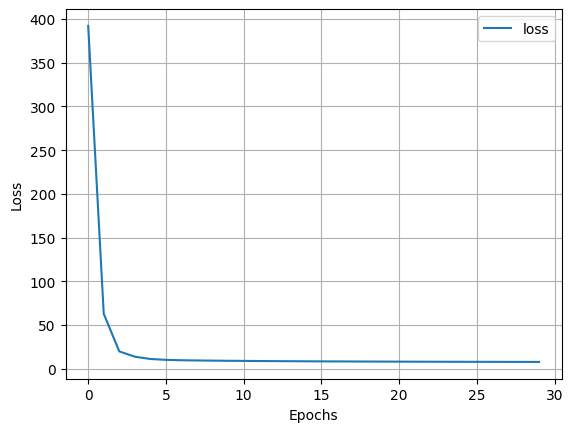

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

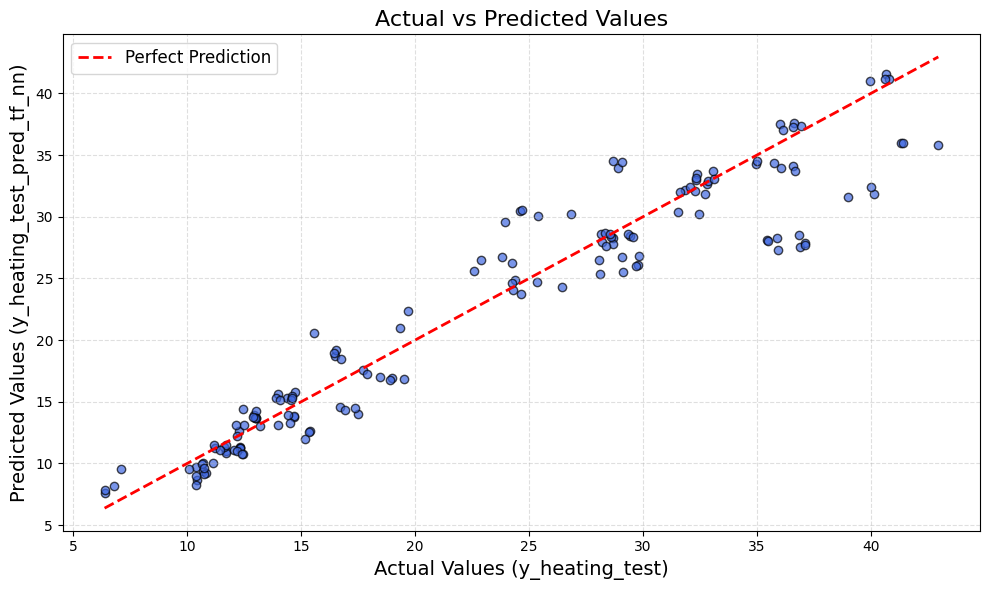

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred_tf_nn, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(),y_heating_test_pred_tf_nn.min())
max_val = max(y_heating_test.max(), y_heating_test_pred_tf_nn.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred_tf_nn)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.5 PyTorch Linear Model

In [ ]:
X_train = torch.from_numpy(X_train.values).type(torch.float32)
y_heating_train = torch.from_numpy(y_heating_train.values).type(torch.float32)
X_test = torch.from_numpy(X_test.values).type(torch.float32)
y_heating_test = torch.from_numpy(y_heating_test.values).type(torch.float32)

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=8, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model_pytorch_linear = LinearRegressionModel()

In [ ]:
loss_fn = nn.MSELoss()
optimizer_1 = torch.optim.Adam(params = model_pytorch_linear.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 3000 # After several iterations, this was determined to be the optimal value.

epoch_count_1 = []
loss_values_1 = []
test_loss_values_1 = []

y_heating_train = y_heating_train.unsqueeze(1)
y_heating_test = y_heating_test.unsqueeze(1)

for epoch in range(epochs):
    model_pytorch_linear.train()
    
    y_pred_1 = model_pytorch_linear(X_train)
    
    loss_1 = loss_fn(y_pred_1, y_heating_train)
    
    optimizer_1.zero_grad()
    
    loss_1.backward()
    
    optimizer_1.step()

    model_pytorch_linear.eval()


    with torch.inference_mode():
        test_pred_1 = model_pytorch_linear(X_test)
        test_loss_1 = loss_fn(test_pred_1, y_heating_test)

    if epoch % 10 == 0:
        epoch_count_1.append(epoch)
        loss_values_1.append(loss_1)
        test_loss_values_1.append(test_loss_1)
        print(f"Epoch: {epoch} | Test: {loss_1} | Test loss: {test_loss_1}")
    
    y_heating_test_pred_pt_linear = test_pred_1



Epoch: 0 | Test: 562.6014404296875 | Test loss: 597.2597045898438
Epoch: 10 | Test: 540.3486328125 | Test loss: 574.363525390625
Epoch: 20 | Test: 518.71923828125 | Test loss: 552.0948486328125
Epoch: 30 | Test: 497.776123046875 | Test loss: 530.515625
Epoch: 40 | Test: 477.5546569824219 | Test loss: 509.66009521484375
Epoch: 50 | Test: 458.0670166015625 | Test loss: 489.5395812988281
Epoch: 60 | Test: 439.3106689453125 | Test loss: 470.1512145996094
Epoch: 70 | Test: 421.2745666503906 | Test loss: 451.48406982421875
Epoch: 80 | Test: 403.94390869140625 | Test loss: 433.5235290527344
Epoch: 90 | Test: 387.3019714355469 | Test loss: 416.2532043457031
Epoch: 100 | Test: 371.3311767578125 | Test loss: 399.6557922363281
Epoch: 110 | Test: 356.0138244628906 | Test loss: 383.71417236328125
Epoch: 120 | Test: 341.3320007324219 | Test loss: 368.4106750488281
Epoch: 130 | Test: 327.2678527832031 | Test loss: 353.7278747558594
Epoch: 140 | Test: 313.80352783203125 | Test loss: 339.64837646484375

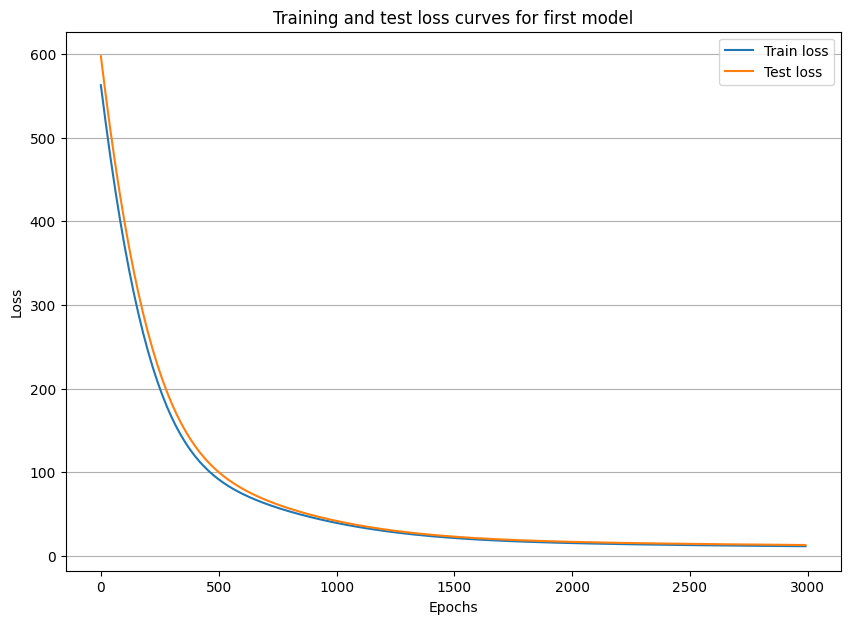

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count_1, np.array(torch.tensor(loss_values_1).numpy()), label="Train loss")
plt.plot(epoch_count_1, np.array(torch.tensor(test_loss_values_1).numpy()), label="Test loss")
plt.title("Training and test loss curves for first model")
plt.grid(visible=True, axis="y")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend() 
plt.show()

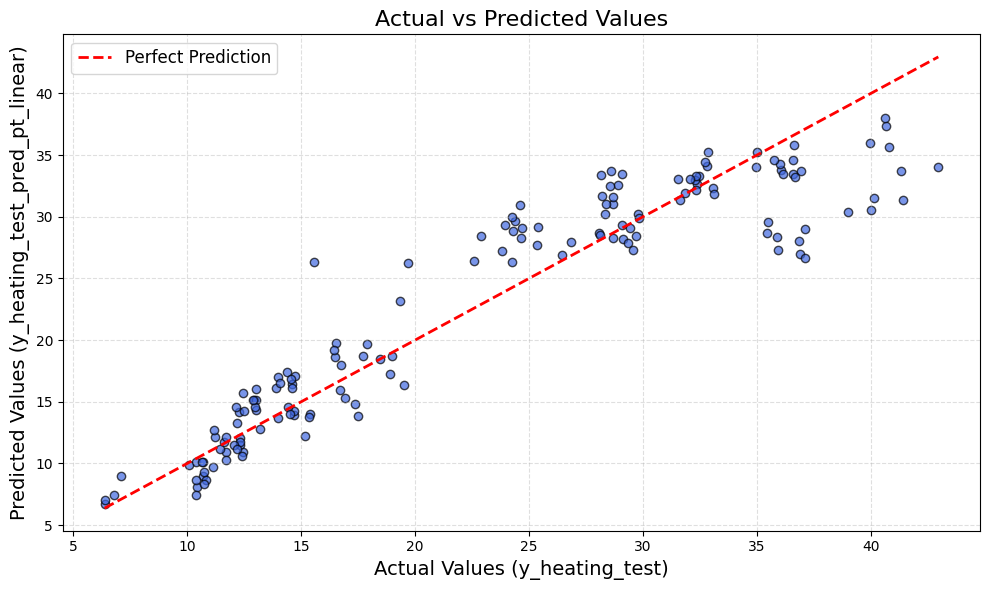

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred_pt_linear.detach().numpy(), color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(),y_heating_test_pred_pt_linear.detach().numpy().min())
max_val = max(y_heating_test.max(), y_heating_test_pred_pt_linear.detach().numpy().max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred_pt_linear)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.6 PyTorch NeuralNetwork Model

In [ ]:
class NeuralNetworkModel(nn.Module):
    def __init__(self,):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=8, out_features=100)
        self.layer_2 = nn.Linear(in_features=100, out_features=100)
        self.layer_3 = nn.Linear(in_features=100, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_pytorch_nn = NeuralNetworkModel()
model_pytorch_nn

NeuralNetworkModel(
  (layer_1): Linear(in_features=8, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
torch.manual_seed(42)
model_pytorch_nn = LinearRegressionModel()

In [ ]:
loss_bce = nn.MSELoss()
optimizer_2 = torch.optim.SGD(model_pytorch_nn.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)

epochs = 1000 # After several iterations, this was determined to be the optimal value.

epoch_count_2 = []
loss_values_2 = []
test_loss_values_2 = []

for epoch in range(epochs):
    model_pytorch_nn.train()
    
    y_pred_2 = model_pytorch_nn(X_train)
    
    loss_2 = loss_bce(y_pred_2, y_heating_train)
    
    optimizer_2.zero_grad()
    
    loss_2.backward()
    
    optimizer_2.step()

    model_pytorch_nn.eval()

    with torch.inference_mode():
        test_pred_2 = model_pytorch_nn(X_test).squeeze()
        test_loss_2 = loss_fn(test_pred_2, y_heating_test)

    if epoch % 10 == 0:
        epoch_count_2.append(epoch)
        loss_values_2.append(loss_2)
        test_loss_values_2.append(test_loss_2)
        print(f"Epoch: {epoch} | Test: {loss_2} | Test loss: {test_loss_2}")
    
    y_heating_test_pred_pt_nn = test_pred_2



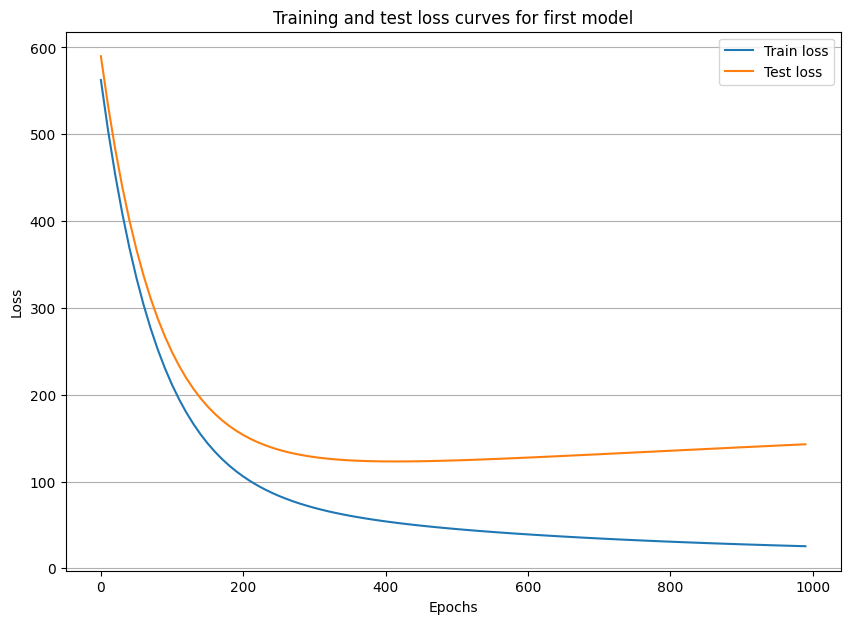

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count_2, np.array(torch.tensor(loss_values_2).numpy()), label="Train loss")
plt.plot(epoch_count_2, np.array(torch.tensor(test_loss_values_2).numpy()), label="Test loss")
plt.title("Training and test loss curves for first model")
plt.grid(visible=True, axis="y")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend() 
plt.show()

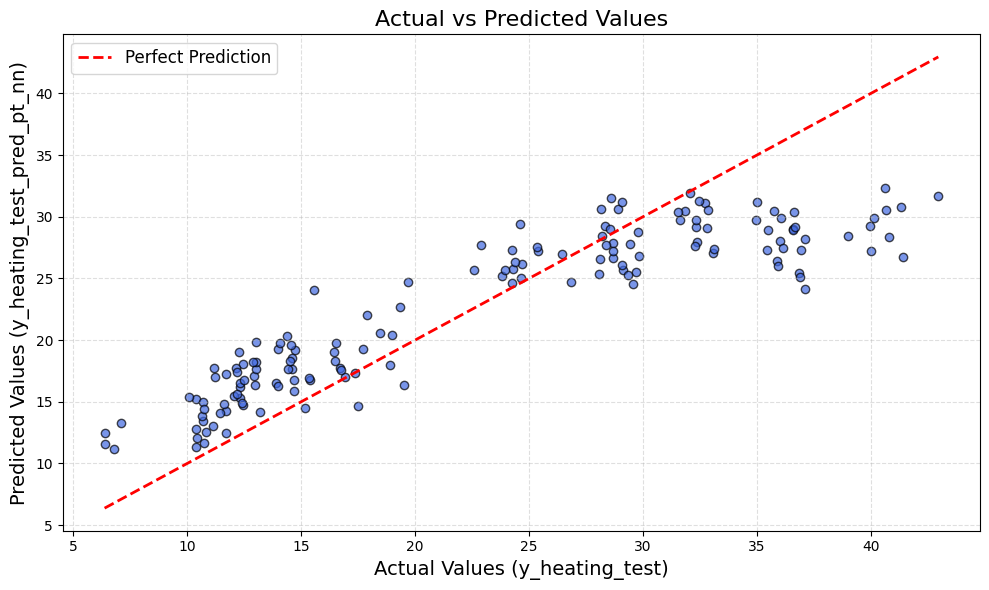

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred_pt_nn.detach().numpy(), color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(),y_heating_test_pred_pt_nn.detach().numpy().min())
max_val = max(y_heating_test.max(), y_heating_test_pred_pt_nn.detach().numpy().max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred_pt_nn)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()